In [3]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df = df[df["job_title_short"]=="Data Analyst"]

In [5]:
df_exploded = df.explode("job_skills")
df_exploded.groupby("job_skills").size() #job_skills boyutlarını gruplar ve sayar ve satırları döndürür

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [18]:

skill_stats=df_exploded.groupby("job_skills").agg(
    skill_count=("job_skills", "count"),
    median_salary=("salary_year_avg", "median"),

)
skills_stats=skill_stats.sort_values(by="skill_count", ascending=False).head(10)

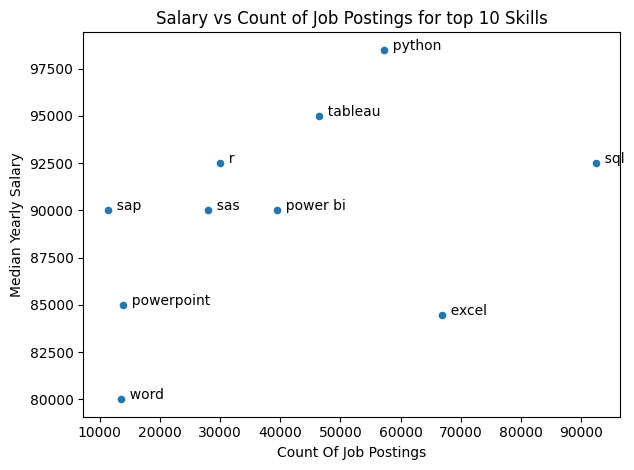

In [24]:
skills_stats.plot(kind="scatter", x="skill_count", y="median_salary", title="Top 10 Job Skills for Data Analyst")
plt.xlabel("Count Of Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Salary vs Count of Job Postings for top 10 Skills")
plt.tight_layout()
for i,txt in enumerate(skills_stats.index):
   plt.text( skills_stats["skill_count"].iloc[i], skills_stats["median_salary"].iloc[i],"  " +txt)

plt.show()